Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012


   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # Bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric) 

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # Related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # Other attributes:

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [25]:
# Importing Libs 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
bank = pd.read_excel("Bank.xlsx")
bank.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,P-Day,Previous,Poutcome,Subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         45211 non-null  int64 
 1   Job         45211 non-null  object
 2   Marital     45211 non-null  object
 3   Education   45211 non-null  object
 4   Default     45211 non-null  int64 
 5   Balance     45211 non-null  int64 
 6   Housing     45211 non-null  int64 
 7   Loan        45211 non-null  int64 
 8   Contact     45211 non-null  object
 9   Day         45211 non-null  int64 
 10  Month       45211 non-null  object
 11  Duration    45211 non-null  int64 
 12  Campaign    45211 non-null  int64 
 13  P-Day       45211 non-null  int64 
 14  Previous    45211 non-null  int64 
 15  Poutcome    45211 non-null  object
 16  Subscribed  45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


### EDA

Q1. How many customers subscribed vs the unsubscribed?

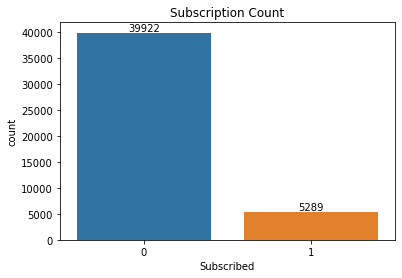

In [28]:
# Graphical representation of the Subscribed count
ax =sns.countplot(data=bank, x='Subscribed', order=bank['Subscribed'].value_counts().index)
ax.set_title('Subscription Count')
for container in ax.containers:
    ax.bar_label(container)

Q2. Find the subscription by Job, Marital Status, Education & Job

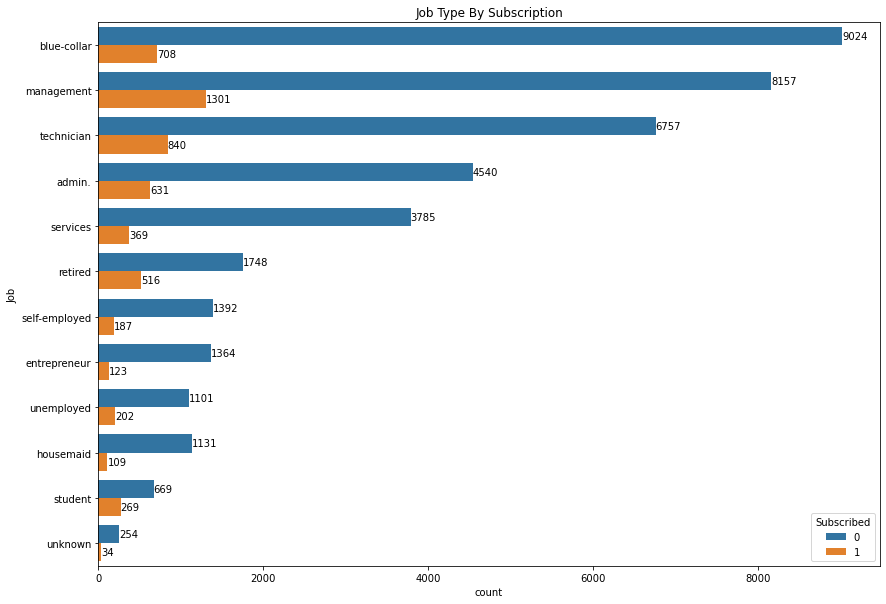

In [29]:
plt.figure(figsize=(14,10))
ax =sns.countplot(data=bank, y='Job', order=bank['Job'].value_counts().index, hue = 'Subscribed')
ax.set_title('Job Type By Subscription')
for container in ax.containers:
    ax.bar_label(container)

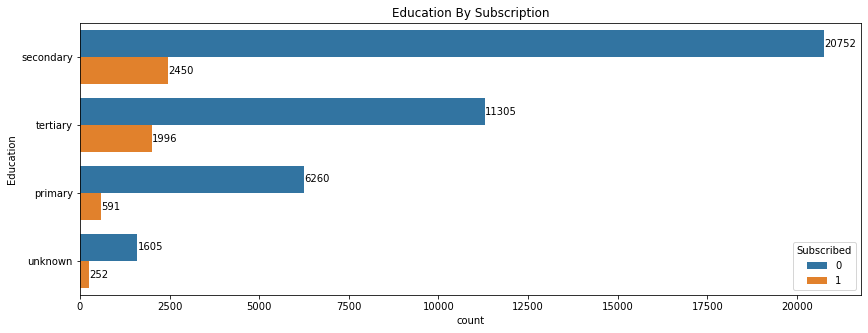

In [30]:
plt.figure(figsize=(14,5))
ax =sns.countplot(data=bank, y='Education', order=bank['Education'].value_counts().index, hue = 'Subscribed')
ax.set_title('Education By Subscription')
for container in ax.containers:
    ax.bar_label(container)

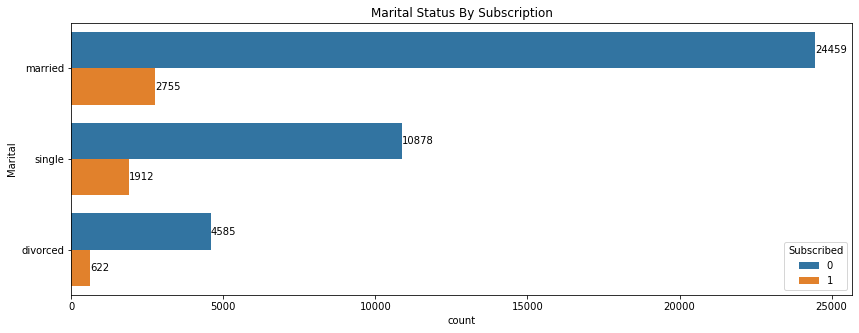

In [31]:
plt.figure(figsize=(14,5))
ax =sns.countplot(data=bank, y='Marital', order=bank['Marital'].value_counts().index, hue = 'Subscribed')
ax.set_title('Marital Status By Subscription')
for container in ax.containers:
    ax.bar_label(container)

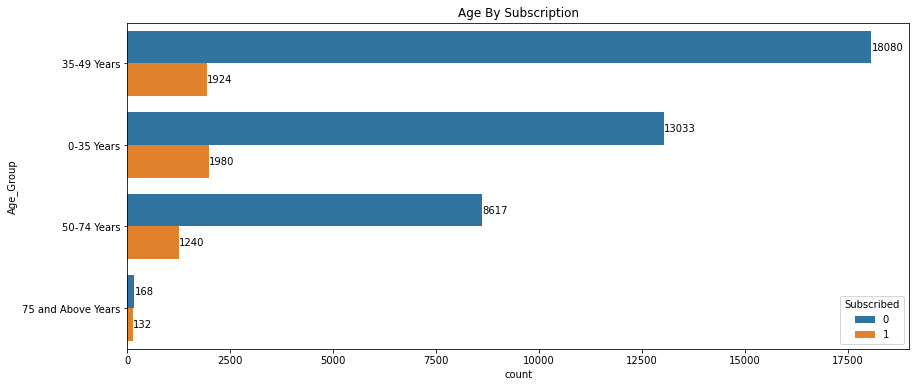

In [32]:
# Age ( <35, <50 <75 >75)
plt.figure(figsize=(14, 6))
bank.loc[(bank['Age'] <35), 'Age_Group'] = '0-35 Years'
bank.loc[(bank['Age'] > 34)&(bank['Age'] < 50), 'Age_Group'] = '35-49 Years'
bank.loc[(bank['Age'] > 49)&(bank['Age'] < 74), 'Age_Group'] = '50-74 Years'
bank.loc[(bank['Age'] > 74),'Age_Group'] = '75 and Above Years'

ax =sns.countplot(data=bank, y='Age_Group', order=bank['Age_Group'].value_counts().index, hue = 'Subscribed')
ax.set_title('Age By Subscription')
for container in ax.containers:
    ax.bar_label(container)

### Feature Engineering For Classification

In [33]:
bank_ohe = bank
categorical_columns = ['Job','Marital','Education','Contact', 
                       'Month', 'Poutcome', 'Age_Group']
for col in categorical_columns:
    col_ohe = pd.get_dummies(bank[col], prefix=col)
    bank_ohe = pd.concat((bank_ohe, col_ohe), axis=1).drop(col, axis=1)

bank_ohe.drop('Age', axis=1, inplace=True)
bank_ohe.columns

Index(['Default', 'Balance', 'Housing', 'Loan', 'Day', 'Duration', 'Campaign',
       'P-Day', 'Previous', 'Subscribed', 'Job_admin.', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital_divorced', 'Marital_married',
       'Marital_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'Contact_cellular',
       'Contact_telephone', 'Contact_unknown', 'Month_apr', 'Month_aug',
       'Month_dec', 'Month_feb', 'Month_jan', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'Poutcome_failure', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown', 'Age_Group_0-35 Years', 'Age_Group_35-49 Years',
       'Age_Group_50-74 Years', 'Age_Group_75 and Above Years'],
      dtype='object')

In [34]:
from sklearn import preprocessing
X = bank_ohe[['Default', 'Balance', 'Housing', 'Loan', 'Day', 'Duration', 'Campaign',
       'P-Day', 'Previous', 'Subscribed', 'Job_admin.', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital_divorced', 'Marital_married',
       'Marital_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'Contact_cellular',
       'Contact_telephone', 'Contact_unknown', 'Month_apr', 'Month_aug',
       'Month_dec', 'Month_feb', 'Month_jan', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'Poutcome_failure', 'Poutcome_other', 'Poutcome_success',
       'Poutcome_unknown', 'Age_Group_0-35 Years', 'Age_Group_35-49 Years',
       'Age_Group_50-74 Years', 'Age_Group_75 and Above Years']]
y =bank_ohe['Subscribed'].values

In [35]:
#scaling is important
X =preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.35489888e-01,  2.56419252e-01,  8.93915409e-01,
        -4.36803470e-01, -1.29847633e+00,  1.10160979e-02,
        -5.69350638e-01, -4.11453106e-01, -2.51940371e-01,
        -3.63982613e-01, -3.59368688e-01, -5.23739543e-01,
        -1.84414702e-01, -1.67929762e-01,  1.94427007e+00,
        -2.29599953e-01, -1.90234160e-01, -3.18082400e-01,
        -1.45556614e-01, -4.49413696e-01, -1.72266322e-01,
        -8.00685324e-02, -3.60779689e-01,  8.13212168e-01,
        -6.28090275e-01, -4.22607971e-01, -1.02674490e+00,
         1.54889242e+00, -2.06962359e-01, -1.35602988e+00,
        -2.62090908e-01,  1.57239532e+00, -2.63341697e-01,
        -4.00409143e-01, -6.89628350e-02, -2.49476685e-01,
        -1.78958414e-01, -4.24206240e-01, -3.66005972e-01,
        -1.03261950e-01,  1.51137390e+00, -3.10263480e-01,
        -1.28819013e-01, -1.13898003e-01, -3.48687158e-01,
        -2.05972478e-01, -1.85948001e-01,  4.72519247e-01,
        -7.05090157e-01, -8.90836170e-01,  1.89385577e+0

In [36]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (33908, 52) (33908,)
Test set:  (11303, 52) (11303,)


In [37]:
# The Data is imbalanced
# Most researches have pointed out that undersampling in most cases does produce better results than oversampling

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0: 29931, 1: 3977})
After undersampling:  Counter({0: 3977, 1: 3977})


### Modeling to Find the Best Model

#### Model 1: Logistic Rregression

In [38]:
#importing libaries
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [39]:
# Model fitting
LR = LogisticRegression(C= 0.01, solver = 'liblinear').fit(X_train_under, y_train_under)
# Prediction
yhat2 = LR.predict(X_test)
yhat2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
#estimates for all classes 
yhat2_prob = LR.predict_proba(X_test)
yhat2_prob

array([[0.94107627, 0.05892373],
       [0.94813022, 0.05186978],
       [0.95466147, 0.04533853],
       ...,
       [0.89643927, 0.10356073],
       [0.94942565, 0.05057435],
       [0.9338444 , 0.0661556 ]])

In [41]:
#evaluation 
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat2)

0.9992383853769993

In [42]:
#finding the f1 score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, yhat2, average='weighted')
F1_score

0.9999115425508642

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9991
           1       1.00      1.00      1.00      1312

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



In [44]:
#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC(kernel='rbf', gamma = 'scale')
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))
#report
print(classification_report(y_test, pred_under))

ROC AUC score for undersampled data:  0.9983985587028326
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9991
           1       0.98      1.00      0.99      1312

    accuracy                           1.00     11303
   macro avg       0.99      1.00      0.99     11303
weighted avg       1.00      1.00      1.00     11303



In [45]:
# Using Smote
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [46]:
# define pipeline
model = SVC()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

#PART 2
# import libraries for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)


ROC AUC score for the combined sampling method: 0.999


In [47]:
#Testing for something new
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
#scaler = StandardScaler()

def ind_prediction(newdata):
    data = newdata.values.reshape(1,-1)
    data = preprocessing.StandardScaler().fit(data).transform(data)
    prob = LR.predict_proba(data)[0][1]
    if prob >=0.25:
        return 'Subscribe 1'
    else:
        return 'Subscribe 0'

# Remaining part is pickling and deploying the model to Heroku
# put values in after the , eg ('Default', 0)
from collections import OrderedDict
newdata = OrderedDict([('Default',0), ('Balance',-171), ('Housing',1), ('Loan',0), ('Day',5), ('Duration',242), ('Campaign',1),
       ('P-Day',-1), ('Previous',0), ('Subscribed',0), ('Job_admin.',1), ('Job_blue-collar',0),
       ('Job_entrepreneur',0), ('Job_housemaid',0), ('Job_management',0), ('Job_retired',0),
       ('Job_self-employed',0), ('Job_services',0), ('Job_student',0), ('Job_technician',0),
       ('Job_unemployed',0), ('Job_unknown',0), ('Marital_divorced',0), ('Marital_married',0),
       ('Marital_single',1), ('Education_primary',1), ('Education_secondary',0),
       ('Education_tertiary',0), ('Education_unknown',0), ('Contact_cellular',0),
       ('Contact_telephone',0), ('Contact_unknown',1), ('Month_apr',0), ('Month_aug',0),
       ('Month_dec',0), ('Month_feb',0), ('Month_jan',0), ('Month_jul',0), ('Month_jun',0),
       ('Month_mar',0), ('Month_may',1), ('Month_nov',0), ('Month_oct',0), ('Month_sep',0),
       ('Poutcome_failure',0), ('Poutcome_other',0), ('Poutcome_success',0),
       ('Poutcome_unknown',1), ('Age_Group_0-35 Years',0), ('Age_Group_35-49 Years',1),
       ('Age_Group_50-74 Years',0), ('Age_Group_75 and Above Years',0)])

newdata = pd.Series(newdata)
ind_prediction(newdata)

'Subscribe 0'